# Heart Attack Probability Prediction Model

## Overview:
This project aims to optimize treatment operations through predicting the early occurence of heart attacks given patient data. 
Link to the dataset: https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

## Contents:
1. Loading the libraries
2. Loading the dataset
3. Data Wrangling
4. Exploratory Data Analysis
5. 

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Loading the dataset

In [2]:
df = pd. read_csv("D:\others\Personal Projects 2\Practice Files July 2024\heart.csv")

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_18424\2902877703.py:1: SyntaxWarning: invalid escape sequence '\o'
  df = pd. read_csv("D:\others\Personal Projects 2\Practice Files July 2024\heart.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Wrangling

In [8]:
## dealing with duplicates

df.duplicated().sum()

0

In [7]:
df = df.drop_duplicates()

len(df)

302

### Exploratory Data Analysis

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
## more descriptive statistics

from scipy.stats import describe

description = describe(df)

for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 302
minmax : (array([ 29.,   0.,   0.,  94., 126.,   0.,   0.,  71.,   0.,   0.,   0.,
         0.,   0.,   0.]), array([ 77. ,   1. ,   3. , 200. , 564. ,   1. ,   2. , 202. ,   1. ,
         6.2,   2. ,   4. ,   3. ,   1. ]))
mean : [5.44205298e+01 6.82119205e-01 9.63576159e-01 1.31602649e+02
 2.46500000e+02 1.49006623e-01 5.26490066e-01 1.49569536e+02
 3.27814570e-01 1.04304636e+00 1.39735099e+00 7.18543046e-01
 2.31456954e+00 5.43046358e-01]
variance : [8.18657565e+01 2.17552969e-01 1.06511408e+00 3.08472817e+02
 2.67842359e+03 1.27224924e-01 2.76704583e-01 5.24571561e+02
 2.21084245e-01 1.34897142e+00 3.79793624e-01 1.01354206e+00
 3.75800312e-01 2.48971420e-01]
skewness : [-0.20272991 -0.78221017  0.4905694   0.71297753  1.14162586  1.97134685
  0.16862372 -0.53002187  0.73361419  1.25987509 -0.50074372  1.28929377
 -0.47883888 -0.17282712]
kurtosis : [-0.53862102 -1.38814725 -1.18402367  0.88798365  4.44792873  1.88620839
 -1.35686249 -0.08096349 -1.46181022  1.52223635 -

<Figure size 500x300 with 0 Axes>

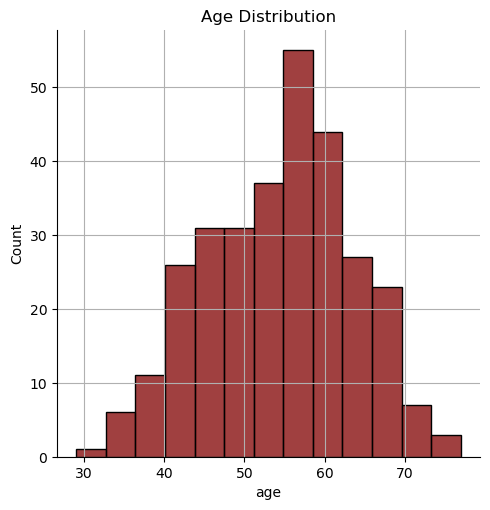

In [17]:
## Age Distribution

plt.figure(figsize=(5,3), frameon=True, facecolor = "lightgrey")
sns.displot(data=df, x= "age", color = "maroon")
plt.grid(True)
plt.title("Age Distribution")
plt.show()

### Plotting the Heart Attack Prediction Model

In [18]:
## loading the regressor 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression()

In [21]:
## dividing the data into training and testing splits

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [23]:
## fitting the model

log_reg.fit(X_train, y_train)

C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
## intercept

log_reg.intercept_

array([-0.02445128])

In [29]:
## coefficients

log_reg.coef_

array([[-2.54072541e-03, -1.15630101e+00,  7.98654644e-01,
        -7.24737294e-03, -4.27039973e-04,  3.41097327e-02,
         5.95527998e-01,  2.28022163e-02, -9.32521956e-01,
        -6.73730446e-01,  4.07227915e-01, -7.82668210e-01,
        -6.72806643e-01]])

In [32]:
## predicting the values

pred = log_reg.predict(X_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [33]:
## getting the p-value

from sklearn.feature_selection import chi2

scores, pvalues = chi2(X_test, y_test)
pvalues

array([6.69926680e-03, 2.06238758e-01, 2.33616850e-05, 3.69702231e-03,
       5.89991904e-05, 2.42663010e-01, 8.54999305e-01, 1.39708251e-13,
       4.71253042e-02, 1.75149877e-05, 2.03749606e-01, 2.41569700e-06,
       9.92304557e-02])

In [38]:
## confustion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(pred, y_test)

array([[26,  6],
       [ 6, 38]], dtype=int64)

In [41]:
## calculating the accracy

accuracy = round((26 + 38) / (26 + 6 + 6 + 38), 4)

percentage = "{:.2f}%".format(accuracy* 100)
print(percentage)

84.21%


### Conclusion: 
The model has an 84.21% of predicting heart attacks making it a good predictor

### Application: 
Healthcare providers can utilize this to minimize heart attack cases occcurence in their facilities.